In [26]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%pylab inline

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import applications, optimizers
from keras.models import Model

Populating the interactive namespace from numpy and matplotlib


In [2]:
dataset_path =  r"/bigdata/projects/dogs_vs_cats/datas"
os.listdir(dataset_path)

['train', 'test', 'sampleSubmission.csv', 'backup', 'validation']

In [3]:
os.listdir(os.path.join(dataset_path, 'train/dogs'))[:5]

['dog.3311.jpg',
 'dog.4619.jpg',
 'dog.10235.jpg',
 'dog.11060.jpg',
 'dog.9033.jpg']

In [4]:
dog_img = os.path.join(os.path.join(dataset_path, 'train/dogs'), "dog.3311.jpg")
dog_img

'/bigdata/projects/dogs_vs_cats/datas/train/dogs/dog.3311.jpg'

In [5]:
datagen = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

In [6]:
img = load_img(dog_img)
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

In [7]:
!mkdir preview
!ls

classification_dogs_vs_cats_use_keras.ipynb  my_model_weights.h5
first_try.h5				     preview
mnist.npz				     Untitled1.ipynb
my_model.h5				     Untitled.ipynb


In [8]:
for batch in datagen.flow(x, batch_size=1, save_to_dir='preview', save_prefix='dog', save_format='jpeg'):
    print(batch.shape)
    break

(1, 3, 331, 500)


In [9]:
i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir='preview', save_prefix='dog', save_format='jpeg'):
    i += 1
    if i > 20:
        break

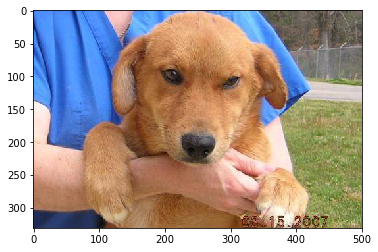

In [10]:
plt.imshow(img)

In [11]:
gen_imgs = [load_img(os.path.join("preview", x)) for x in os.listdir("preview")][:9]

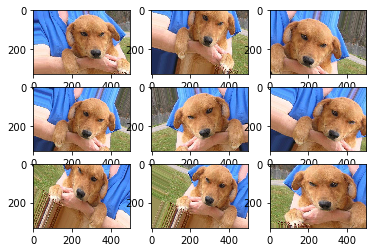

In [62]:
fig = plt.figure()
for i in range(3):
    for j in range(3):
        idx = (3 * i) + j
        plt.subplot(3, 3, idx + 1)
        plt.imshow(gen_imgs[idx])
plt.show()

In [13]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 150, 150)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [4]:
batch_size = 16

train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(os.path.join(dataset_path, 'train'),
                                                   target_size=(150, 150),
                                                   batch_size=batch_size,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(os.path.join(dataset_path, 'validation'),
                                                   target_size=(150, 150),
                                                   batch_size=batch_size,
                                                   class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [15]:
model.fit_generator(train_generator,
                   steps_per_epoch=1000,
                   epochs=10,
                   validation_data=validation_generator,
                   validation_steps=800)
model.save_weights("first_try.h5")

Epoch 1/10
1000/1000 [==============================] - 128s - loss: 0.6368 - acc: 0.6407 - val_loss: 0.5525 - val_acc: 0.7162
Epoch 2/10
1000/1000 [==============================] - 124s - loss: 0.5555 - acc: 0.7204 - val_loss: 0.5198 - val_acc: 0.7561
Epoch 3/10
1000/1000 [==============================] - 123s - loss: 0.5369 - acc: 0.7444 - val_loss: 0.4829 - val_acc: 0.7847
Epoch 4/10
1000/1000 [==============================] - 128s - loss: 0.5030 - acc: 0.7704 - val_loss: 0.4796 - val_acc: 0.7643
Epoch 5/10
1000/1000 [==============================] - 125s - loss: 0.4863 - acc: 0.7771 - val_loss: 0.4941 - val_acc: 0.7818
Epoch 6/10
1000/1000 [==============================] - 122s - loss: 0.4742 - acc: 0.7861 - val_loss: 0.4452 - val_acc: 0.8065
Epoch 7/10
1000/1000 [==============================] - 121s - loss: 0.4591 - acc: 0.7969 - val_loss: 0.4319 - val_acc: 0.8077
Epoch 8/10
1000/1000 [==============================] - 125s - loss: 0.4519 - acc: 0.7977 - val_loss: 0.4521 - 

In [5]:
img_width, img_height = 150, 150
top_model_weights_path = 'nottleneck_fc_model.h5'
train_data_dir = os.path.join(dataset_path, 'train')
validation_data_dir = os.path.join(dataset_path, 'validation')
nb_train_samples = 20000
nb_validation_samples = 5000
epochs = 10
batch_size = 10

In [59]:
def save_bottlebeck_features():
    datagen = ImageDataGenerator(rescale=1./255)
    model = applications.VGG16(include_top=False, weights='imagenet')
    generator = datagen.flow_from_directory(train_data_dir,
                                           target_size=(img_width, img_height),
                                           batch_size=batch_size,
                                           class_mode=None,
                                           shuffle=False)
    bottleneck_features_train = model.predict_generator(generator, nb_train_samples // batch_size)
    np.save(open('bottleneck_features_train.npy', 'w'), bottleneck_features_train)
    
    generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_validation = model.predict_generator(generator, nb_validation_samples // batch_size)
    np.save(open('bottleneck_features_validation.npy', 'w'), bottleneck_features_validation)

In [53]:
def train_top_model():
    train_data = np.load(open('bottleneck_features_train.npy'))
    train_labels = np.array(
        [0] * (nb_train_samples / 2) + [1] * (nb_train_samples / 2))

    validation_data = np.load(open('bottleneck_features_validation.npy'))
    validation_labels = np.array(
        [0] * (nb_validation_samples / 2) + [1] * (nb_validation_samples / 2))

    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(train_data, train_labels,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(validation_data, validation_labels))
    model.save_weights(top_model_weights_path)

In [60]:
save_bottlebeck_features()

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [61]:
train_top_model()

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 13s - loss: 0.3778 - acc: 0.8541 - val_loss: 0.2573 - val_acc: 0.8966
Epoch 2/10
20000/20000 [==============================] - 10s - loss: 0.2992 - acc: 0.8883 - val_loss: 0.2910 - val_acc: 0.8846
Epoch 3/10
20000/20000 [==============================] - 10s - loss: 0.2758 - acc: 0.8973 - val_loss: 0.2607 - val_acc: 0.8994
Epoch 4/10
20000/20000 [==============================] - 10s - loss: 0.2627 - acc: 0.9010 - val_loss: 0.2642 - val_acc: 0.9096
Epoch 5/10
20000/20000 [==============================] - 10s - loss: 0.2579 - acc: 0.9092 - val_loss: 0.2624 - val_acc: 0.9080
Epoch 6/10
20000/20000 [==============================] - 9s - loss: 0.2496 - acc: 0.9099 - val_loss: 0.2765 - val_acc: 0.9076
Epoch 7/10
20000/20000 [==============================] - 9s - loss: 0.2457 - acc: 0.9133 - val_loss: 0.2755 - val_acc: 0.9038
Epoch 8/10
20000/20000 [==============================] -

In [7]:
!ls

bottleneck_fc_model.h5
bottleneck_features_train.npy
bottleneck_features_validation.npy
build_dataset.ipynb
classification_dogs_vs_cats_use_keras.ipynb
first_try.h5
keras_model_save_load.ipynb
mnist.npz
my_model.h5
my_model_weights.h5
nottleneck_fc_model.h5
preview
vgg16_weights_tf_dim_ordering_tf_kernels.h5


In [8]:
weights_path = "vgg16_weights_tf_dim_ordering_tf_kernels.h5"
top_model_weights_path = "bottleneck_fc_model.h5"

In [20]:
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
print('Model loaded.')

Model loaded.


In [22]:
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

In [28]:
model = Model(inputs=base_model.input, outputs=predictions)

In [29]:
for layer in base_model.layers[:25]:
    layer.trainable = False

In [30]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9), metrics=['accuracy'])

In [32]:
model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples // batch_size,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples // batch_size)

Epoch 1/100
2000/2000 [==============================] - 204s - loss: 0.2521 - acc: 0.8910 - val_loss: 0.2253 - val_acc: 0.9030
Epoch 2/100
2000/2000 [==============================] - 205s - loss: 0.2442 - acc: 0.8952 - val_loss: 0.2261 - val_acc: 0.9073
Epoch 3/100
2000/2000 [==============================] - 203s - loss: 0.2436 - acc: 0.8963 - val_loss: 0.2262 - val_acc: 0.8984
Epoch 4/100
2000/2000 [==============================] - 203s - loss: 0.2439 - acc: 0.8960 - val_loss: 0.2281 - val_acc: 0.8976
Epoch 5/100
2000/2000 [==============================] - 204s - loss: 0.2386 - acc: 0.8983 - val_loss: 0.2191 - val_acc: 0.9039
Epoch 6/100
2000/2000 [==============================] - 205s - loss: 0.2355 - acc: 0.8988 - val_loss: 0.2180 - val_acc: 0.9098
Epoch 7/100
2000/2000 [==============================] - 205s - loss: 0.2333 - acc: 0.9010 - val_loss: 0.2111 - val_acc: 0.9119
Epoch 8/100
2000/2000 [==============================] - 204s - loss: 0.2298 - acc: 0.9017 - val_loss: 0

2000/2000 [==============================] - 203s - loss: 0.1703 - acc: 0.9301 - val_loss: 0.1889 - val_acc: 0.9252
Epoch 65/100
2000/2000 [==============================] - 205s - loss: 0.1683 - acc: 0.9304 - val_loss: 0.1981 - val_acc: 0.9139
Epoch 66/100
2000/2000 [==============================] - 205s - loss: 0.1654 - acc: 0.9319 - val_loss: 0.1959 - val_acc: 0.9145
Epoch 67/100
2000/2000 [==============================] - 203s - loss: 0.1703 - acc: 0.9288 - val_loss: 0.1860 - val_acc: 0.9271
Epoch 68/100
2000/2000 [==============================] - 204s - loss: 0.1676 - acc: 0.9302 - val_loss: 0.1914 - val_acc: 0.9235
Epoch 69/100
2000/2000 [==============================] - 204s - loss: 0.1696 - acc: 0.9299 - val_loss: 0.1826 - val_acc: 0.9247
Epoch 70/100
2000/2000 [==============================] - 204s - loss: 0.1645 - acc: 0.9314 - val_loss: 0.1886 - val_acc: 0.9192
Epoch 71/100
2000/2000 [==============================] - 208s - loss: 0.1645 - acc: 0.9311 - val_loss: 0.1923